In [11]:
# 환경 변수: 민감한 정보 변환 (API, client ID 등) import os(operating system) 

import os
import requests
import pandas as pd #csv 파일로 저장할때

API_KEY = os.getenv("TMDB_API_KEY", "f23e4437a60cdd6233afc765d5d70921")
NOW_LANG = "ko-KR"
PAGE = 1
GENRE_LANG = "ko"
POSTER_BASE = "https://image.tmdb.org/t/p/w500"
BACKDROP_BASE = "https://image.tmdb.org/t/p/w780"

# genres 데이터 적용하기
def genre_ids_to_names(ids, genre_map: dict) -> str :
    if not isinstance(ids, list) :
        return ""
    names = [genre_map.get(i, str(i)) for i in ids]
    return "|".join(names)

#텍스트 개행 수정 함수
def clean_one_line(text: str) -> str :
    if not text :
        return ""
    text = text.replace("\n", " ")
    return " ".join(text.split())

# genres 데이터 가져오기
# 구문이 길어질수록 타입 표기법을 쓰는게 안전하다. api_key: str, -> dict
def fetch_genre_map(api_key: str, language: str = "ko") -> dict :
    url = "https://api.themoviedb.org/3/genre/movie/list"
    params = {"api_key": api_key, "language": language}
    res = requests.get(url, params=params, timeout=20)
    res.raise_for_status()

    genres = res.json().get("genres", [])
    return {g["id"] : g["name"] for g in genres}

# genres 값 찾아오기
genre_map = fetch_genre_map(API_KEY, GENRE_LANG)

     
#now playing 데이터 가져오기
url = "https://api.themoviedb.org/3/movie/now_playing"
params = {"api_key": API_KEY, "language": NOW_LANG, "page": PAGE}

res = requests.get(url, params=params, timeout=20)
res.raise_for_status()

data = res.json()
#res.json 인지 res.text인지 어떻게 구분?

rows = []

for m in data.get("results", []) :
    poster_path = m.get("poster_path")
    backdrop_path = m.get("backdrop_path")

    poster_url = f"{POSTER_BASE}{poster_path}" if poster_path else ""
    backdrop_url = f"{BACKDROP_BASE}{backdrop_path}" if backdrop_path else ""

    genre_ids = m.get("genre_ids", [])

    rows.append({
        "id": m.get("id"),
        "title": m.get("title"),
        "original_title": m.get("original_title"),
        "overview": clean_one_line(m.get("overview")),
        "genre_ids": ",".join(map(str, genre_ids)) if isinstance(genre_ids, list) else "",
        "genre_names": genre_ids_to_names(genre_ids, genre_map),
        "adult": m.get("adult"),
        "original_language": m.get("original_language"),
        "vote_average": m.get("vote_average"),
        "popularity": m.get("popularity"),
        "vote_count": m.get("vote_count"),
        "poster_url": poster_url,
        "backdrop_url": backdrop_url
    })

df = pd.DataFrame(rows, columns=[
    "id",
    "title",
    "original_title",
    "overview",
    "genre_names",
    "genre_ids",
    "adult",
    "original_language",
    "vote_average",
    "popularity",
    "vote_count",
    "poster_url",
    "backdrop_url"
])
out_path = "tmdb_now_playing.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅저장완료 : {out_path} (rows={len(df)})")

df.head()

# backdrop_path 경로 보면 완벽하지 않음. 이를 상대경로라고 하며, API 제공 사이트에서 [IMAGE] 경로 확인하여 변수 설정.
# POSTER_BASE, BACKDROP_BASE. 그리고 url로 전환 poster_url = f"{POSTER_BASE}{poster_path}

✅저장완료 : tmdb_now_playing.csv (rows=20)


,id,title,original_title,overview,genre_names,genre_ids,adult,original_language,vote_average,popularity,vote_count,poster_url,backdrop_url
0,1306368,더 립,The Rip,허름한 은닉처에서 수백만 달러의 현금을 발견한 마이애미 경찰. 신뢰에 금이 가기 시...,액션|스릴러|범죄,"28,53,80",False,en,7.033,346.4826,842,https://image.tmdb.org/t/p/w500/o0d6Us9VWOW0nH...,https://image.tmdb.org/t/p/w780/3F2EXWF1thX0Bd...
1,1043197,더스트 바니,Dust Bunny,“어른도 아이도 함께하는 몬스터 사냥 이야기” 열 살 소녀 오로라는 침대 밑에 숨어...,액션|판타지|스릴러,"28,14,53",False,en,6.564,288.1896,128,https://image.tmdb.org/t/p/w500/vobigFZFvbYPf6...,https://image.tmdb.org/t/p/w780/AecGG1XVCmkk7f...
2,83533,아바타: 불과 재,Avatar: Fire and Ash,"인간들과의 전쟁으로 첫째 아들 ‘네테이얌’을 잃은 후, ‘제이크’와 ‘네이티리’는 ...",SF|모험|판타지,"878,12,14",False,en,7.308,241.8643,1631,https://image.tmdb.org/t/p/w500/l18o0AK18KS118...,https://image.tmdb.org/t/p/w780/3Dqievkc7krcTt...
3,991494,스폰지밥 무비: 네모바지를 찾아서,The SpongeBob Movie: Search for SquarePants,비키니시티에 사는 스폰지밥은 무시무시한 롤러코스터를 탈 수 있는 용감한 ‘빅 가이’...,애니메이션|가족|코미디|모험|판타지,"16,10751,35,12,14",False,en,6.526,183.5545,136,https://image.tmdb.org/t/p/w500/2QCGC4toQXYuIs...,https://image.tmdb.org/t/p/w780/gbjK8p5S1aLXWC...
4,1368166,하우스메이드,The Housemaid,과거를 숨긴 채 완벽한 저택의 가정부로 들어간 밀리가 이상한 행동을 보이는 아내 니...,미스터리|스릴러,"9648,53",False,en,7.102,157.4883,542,https://image.tmdb.org/t/p/w500/fUDX16A4fJXmAu...,https://image.tmdb.org/t/p/w780/sK3z0Naed3H1Wu...


In [15]:
import pandas as pd

CSV_PATH = "tmdb_now_playing.csv"

df = pd.read_csv(CSV_PATH, encoding="utf-8-sig")

num_cols = ["vote_average", "popularity", "vote_count"]

for c in num_cols :
    if c in df.columns :
        df[c] = pd.to_numeric(df[c], errors="coerce")

def split_genres(x: str) :
    x = "" if pd.isna(x) else str(x).strip()
    if not x :
        return []
    if "|" in x :
        parts = [p.strip() for p in x.split("|")]
    else :
        parts = [p.strip() for p in x.split(",")]
    return [p for p in parts if p]
#isna = is -> true? or false?, na -> not available =결측치

df_g = df.copy()
df_g["genre"] = df_g["genre_names"].apply(split_genres)
df_g = df_g.explode("genre")

agg = (
    df_g.groupby("genre", as_index=False)
        .agg(
            movie_count=("id", "nunique"),
            avg_popularity=("popularity", "mean"),
            avg_vote_average=("vote_average", "mean"),
            avg_vote_count=("vote_count", "mean"),
        )
)

agg

# 차트, 도표 안에 들어갈 데이터는 수치화(숫자) 필요. 문자열은 인지 못함
# aggregation : 집계
# mean : 평균 (=average), nunique : 갯수 (number unique)

,genre,movie_count,avg_popularity,avg_vote_average,avg_vote_count
0,SF,6,111.126967,6.990833,351.166667
1,가족,1,183.554500,6.526000,136.000000
2,공포,5,88.190960,6.492200,883.600000
3,드라마,4,133.712250,6.360250,185.000000
4,모험,4,148.664050,6.683500,480.750000
5,미스터리,3,117.834467,6.036000,212.000000
6,범죄,4,192.833475,7.037250,964.250000
7,스릴러,14,137.773407,6.616571,652.500000
8,애니메이션,2,120.629900,7.513000,75.000000
9,액션,9,160.758267,6.790000,838.222222


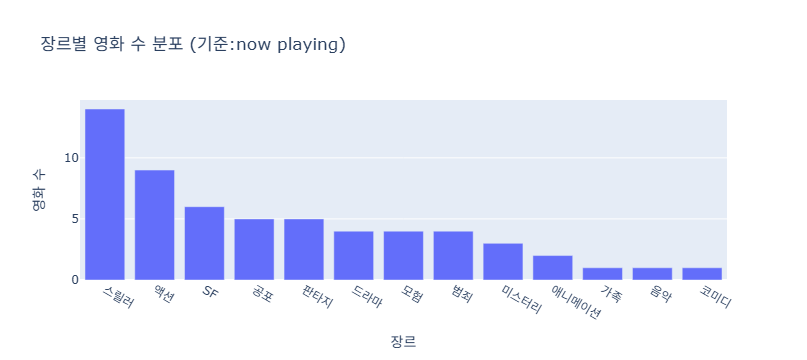

In [23]:
import plotly.express as px

fig = px.bar(
    agg.sort_values("movie_count", ascending=False),
    x="genre",
    y="movie_count",
    title="장르별 영화 수 분포 (기준:now playing)"
)

fig.update_layout(xaxis_title="장르", yaxis_title="영화 수")

fig.show()


# ascending : 오름차순, false-> 내림차순

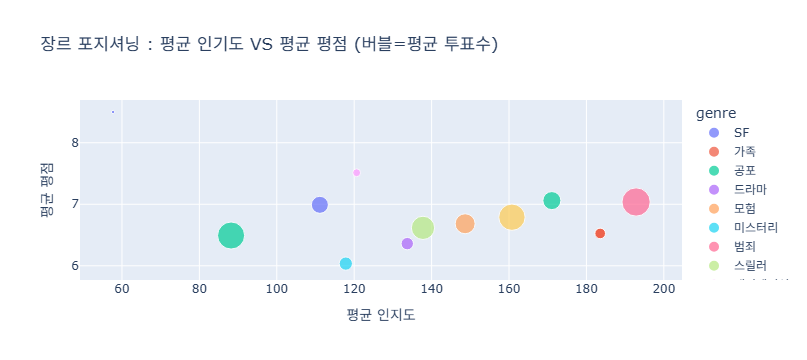

In [29]:
import plotly.express as px

fig = px.scatter(
    agg,
    x="avg_popularity",
    y="avg_vote_average",
    hover_name="genre",
    color="genre",
    size="avg_vote_count",
    title="장르 포지셔닝 : 평균 인기도 VS 평균 평점 (버블=평균 투표수)"
)

fig.update_layout(xaxis_title="평균 인지도", yaxis_title="평균 평점")
fig.show()

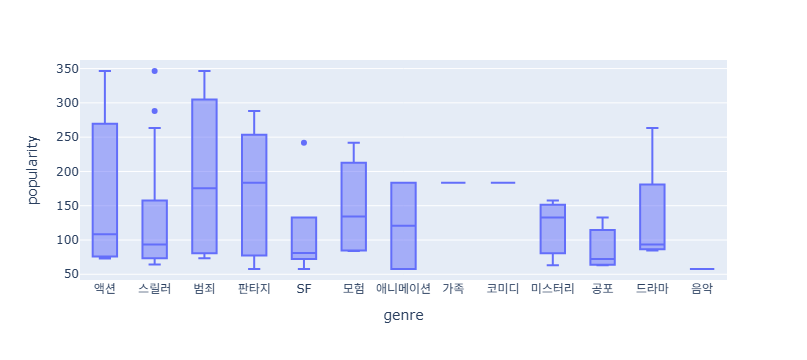

In [31]:
import plotly.express as px

fig = px.box(
    df_g,
    x="genre",
    y="popularity"
)

fig.show()

- [12, 15, 18, 20, 22, 25, 30, 35, 40, 100]
- 일반적으로 데이터를 분석할 때, 평균을 사용하기도 하지만 중앙값(중간값)도 사용한다
- 중앙값(median) : 물리적인 가운데 값
- 짝수 = 5번째 값 + 6번째 값 의 평균
- 홀수 = 가운데 1개값
- 중앙값 = (22+25) / 2 = 23.5
- 하위 50% : 중앙값을 기준으로 아래의 값들 = 12, 15, 18, 20, 22
- 상위 50% : 중앙값을 기준으로 위의 값들 = 25, 30, 35, 40, 100
- 하위 50%의 중앙값 = 1사분위 = Q1 = 전체 데이터의 하위 25% = 18
- 상위 50%의 중앙값 = 3사분위 = Q3 = 전체 데이터의 상위 25% = 35
- IQR(Interquartile Range) : 중앙값 기준 퍼진 정도 (반지름) = Q3-Q1 = 35-18 = 17
- Lower Fence: 하한치 = Q1 - IQR x 1.5 = 18-(17*1.5) = -7.5
- Upper Fence: 상한치 = Q3 + IQR x 1.5 = 35+(17*1.5) = 60.5
- min = 12
- max = 40 (데이터만 보면 100 이지만, 상한치를 벗어나지 않아야한다. 60.5 이하의 최대값)
- Outlier(이상치) = 100
- mean: 평균 = (12+15+18+20+22+25+30+35+40+100) / 10 = 31.7
- 편차: 평균에서의 차이 = 12-31.7 = -19.7, 100-31.7 = 68.3 = 음수/양수보다 평균으로부터 대체적으로 얼마큼 떨어져 있는가가 중요
- 표준편차: 모든 편차의 평균
- 제곱편차: 모든 편차의 값을 제곱해 더함. (표준편차의 경우, 음수 양수 더해지면 0에 수렴하게 되므로) = 5878.10
- 제곱편차 / 10 : 모(집단)분산 = 587.81 =>10개라는 데이터가 확실하게 고정
- 제곱편차 / n - 1 : 표(본)분산 = 653.12 => 데이터 수가 방대할 때 샘플링. n은 전체 집단. "과소추정법칙"
- r(루트) 587.81 = 24.24 = 모분산을 기준으로 표준편차
- r 653.12 = 25.55 = 표분산을 기준으로 계산한 표준편차 

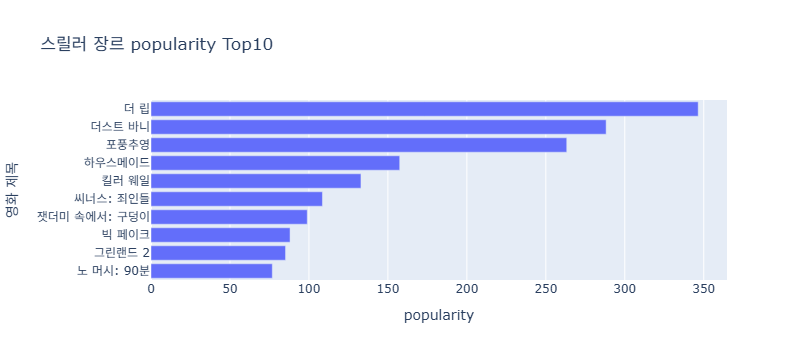

In [38]:
import plotly.express as px

TARGET_GENRE = "스릴러"
TOP_N = 10

tmp = df_g[df_g["genre"] == TARGET_GENRE].copy()
tmp = tmp.dropna(subset=["popularity"])
tmp = tmp.sort_values("popularity", ascending=False).head(TOP_N)

fig = px.bar(
    tmp.sort_values("popularity"),
    x = "popularity",
    y = "title",
    hover_data=["vote_average", "vote_count", "original_language"],
    title=f"{TARGET_GENRE} 장르 popularity Top{TOP_N}"
)

fig.update_layout(xaxis_title="popularity", yaxis_title="영화 제목")
fig.show()